# Exploratory Data Analysis of Iowa House Prices
Lets import some required libraries and the data we need for doing the analysis.

Here we try to 
- Understand the problem, 
- Study the dependant varaible `SalePrice`, 
- Understand the independant and depandant varailbes relation
- Clean the data removing missing data, outliers and handle categorical variables

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
# Getting the train data
Iowa_train = pd.read_csv('Data/Iowa_House_Prices/train.csv')

In [29]:
# Check the columns
Iowa_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Knowing the `SalePrice`

Get to know the `SalePrice` our target by doing a descriptive analysis on it.

In [30]:
# Descriptive Statistics
Iowa_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Skewness and Kurtosis

We measure `Skewness` of the `SalePrice` to check symmetry of the data. Kurtosis to see if the data is heavy tailed or light tailed relative to normal distriubtion. 

Datasets with high Kurtosis tend to have heavy tails or outliers and viceversa. Getting uniform distribution is an extremely rare case. Histogram is a good graphical representation to showcase both of them. [[ref](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)]

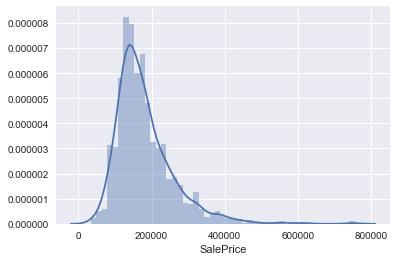

In [31]:
# Histogram
sns.distplot(Iowa_train.SalePrice)

In [32]:
# Skewness and Kurtosis
print('Skewness of the Price parameter: %f' % Iowa_train.SalePrice.skew())
print('Kurtosis is: %f' % Iowa_train.SalePrice.kurt())

Skewness of the Price parameter: 1.882876
Kurtosis is: 6.536282


## `SalePrice` and independant varaibles

We will see how sale price relates to some of the other varaibles.

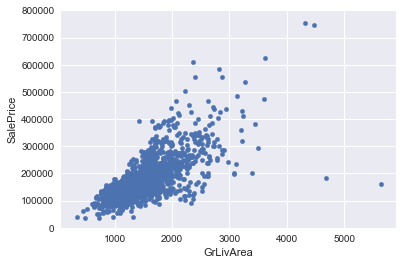

In [33]:
# Scatter plot 'GrLivArea' Vs 'SalePrice'
plot_data_Gr = pd.concat([Iowa_train.SalePrice, Iowa_train.GrLivArea], axis=1)
plot_data_Gr.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

`GrLivArea` seems to have nice linear relation with `SalePrice`

Now, Lets check the same with `TotalBsmtSF`

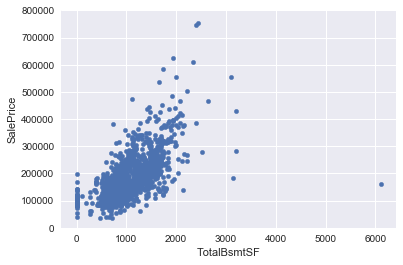

In [34]:
# Scatter plot 'TotalBsmtSF' Vs 'SalePrice'
plot_data_Bs = pd.concat([Iowa_train.SalePrice, Iowa_train.TotalBsmtSF], axis=1)
plot_data_Bs.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

`TotalBsmtSF` seems to also have a good linear relation with `SalePrice` but some values suggest it doesn't seem to be depending on `SalePrice` as its increasing.

So, lets check its relation with other Categorical Variables like `OverallQual`. For categorical values lets use Box plots to see how the independant variable fares.

(-0.5, 9.5, -1105.0, 800000)

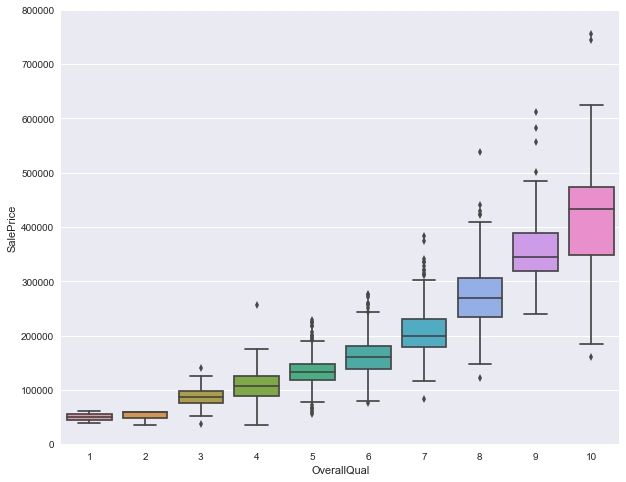

In [35]:
# Box plot OverallQual Vs SalePrice
plot_data_OQ = pd.concat([Iowa_train.SalePrice, Iowa_train.OverallQual], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=plot_data_OQ)
fig.axis(ymax=800000)

We can see that the `OverallQual` is nice predictor aswell and in linear relation to `SalePrice`.

Lets see if `YearBuilt` corelates well with `SalePrice`

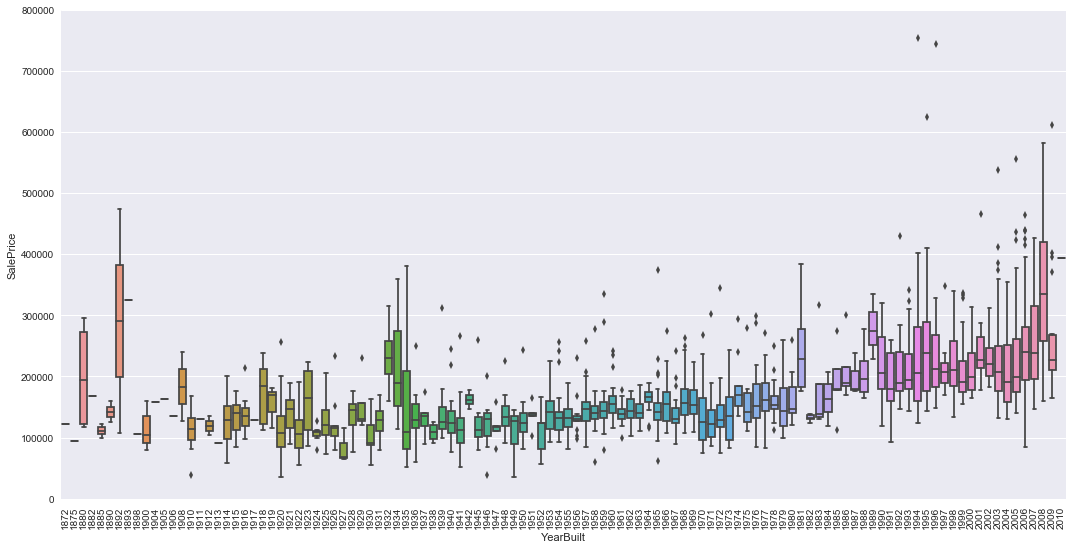

In [36]:
plot_data_YB = pd.concat([Iowa_train.SalePrice, Iowa_train.YearBuilt], axis=1)
f, ax = plt.subplots(figsize=(18, 9))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=plot_data_YB)
fig.axis(ymax=800000)
plt.xticks(rotation=90);

Even though the graph doesnt strongly suggest as new buildings are more costly but there seem to be slight increase in price for newer houses and we know by intuition that newer stuff usually cost more.

We analyzed some variables found some relation with `SalePrice` but not all varaibles are checked so we need to employ some feature selection and feature engineering to do this in a smarter way.

One such technique is using Correlation Heatmap betweem independant variables and dependant variables

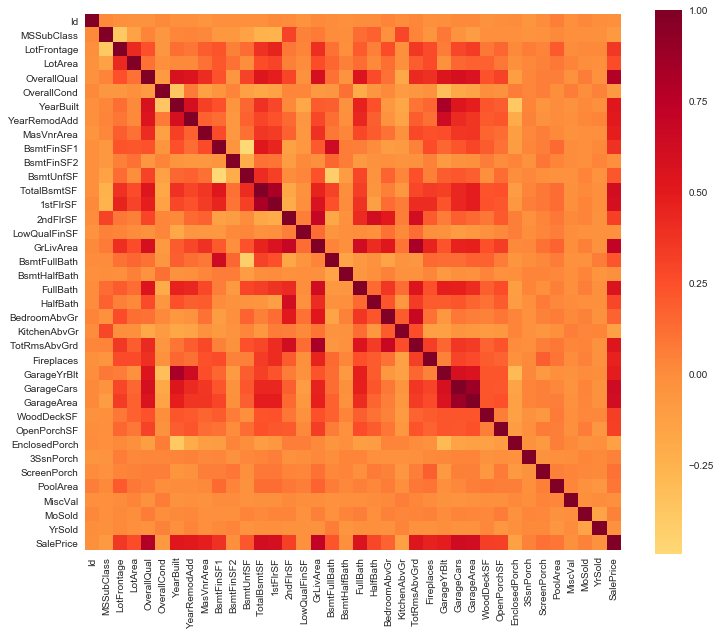

In [37]:
# Correlation Matrix
corr_mat = Iowa_train.corr()

# Correlation heat map
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_mat, vmax=1, center=0, square=True, cmap='YlOrRd')

We can observe some strong correlations from variables, lets see the 10 largest correlated values for SalePrice.

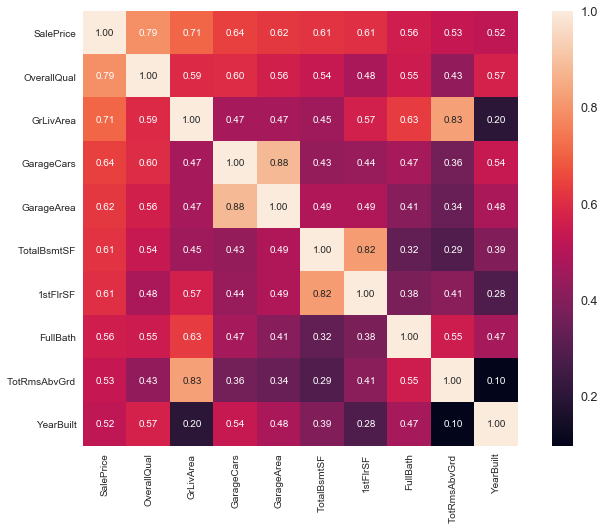

In [38]:
cols_corr = corr_mat.nlargest(10, 'SalePrice')['SalePrice'].index
corr_coef = np.corrcoef(Iowa_train[cols_corr].values.T)
f, ax = plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.25)
sns.heatmap(corr_coef, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=cols_corr.values, xticklabels=cols_corr.values)

We can interpret that the following variables are strongly correlated with `SalePrice` :-

- OverallQual
- GrLivArea
- TotalBsmtSF
- 1stFlrSF
- GarageArea
- GarageCars
- Fullbath
- TotRmsAbvGrd
- GrLivArea
- YearBuilt

`GarageCars` and `GarageArea` are both related and we only need one of these to get a better model later, So since `GarageCars` is higher corr value than `GarageArea` we can select that. 

Similarly `1stFlrSF` and `TotalBsmtSF are related and we can choose `TotalbsmtSF`, `TotRmsAbvGrd` and `GrLivArea` are related aswell so we can choose `GrLivArea` which has higher value.

Now we that we narrowed down on some crucial variables we can check their validity with scatter plots.

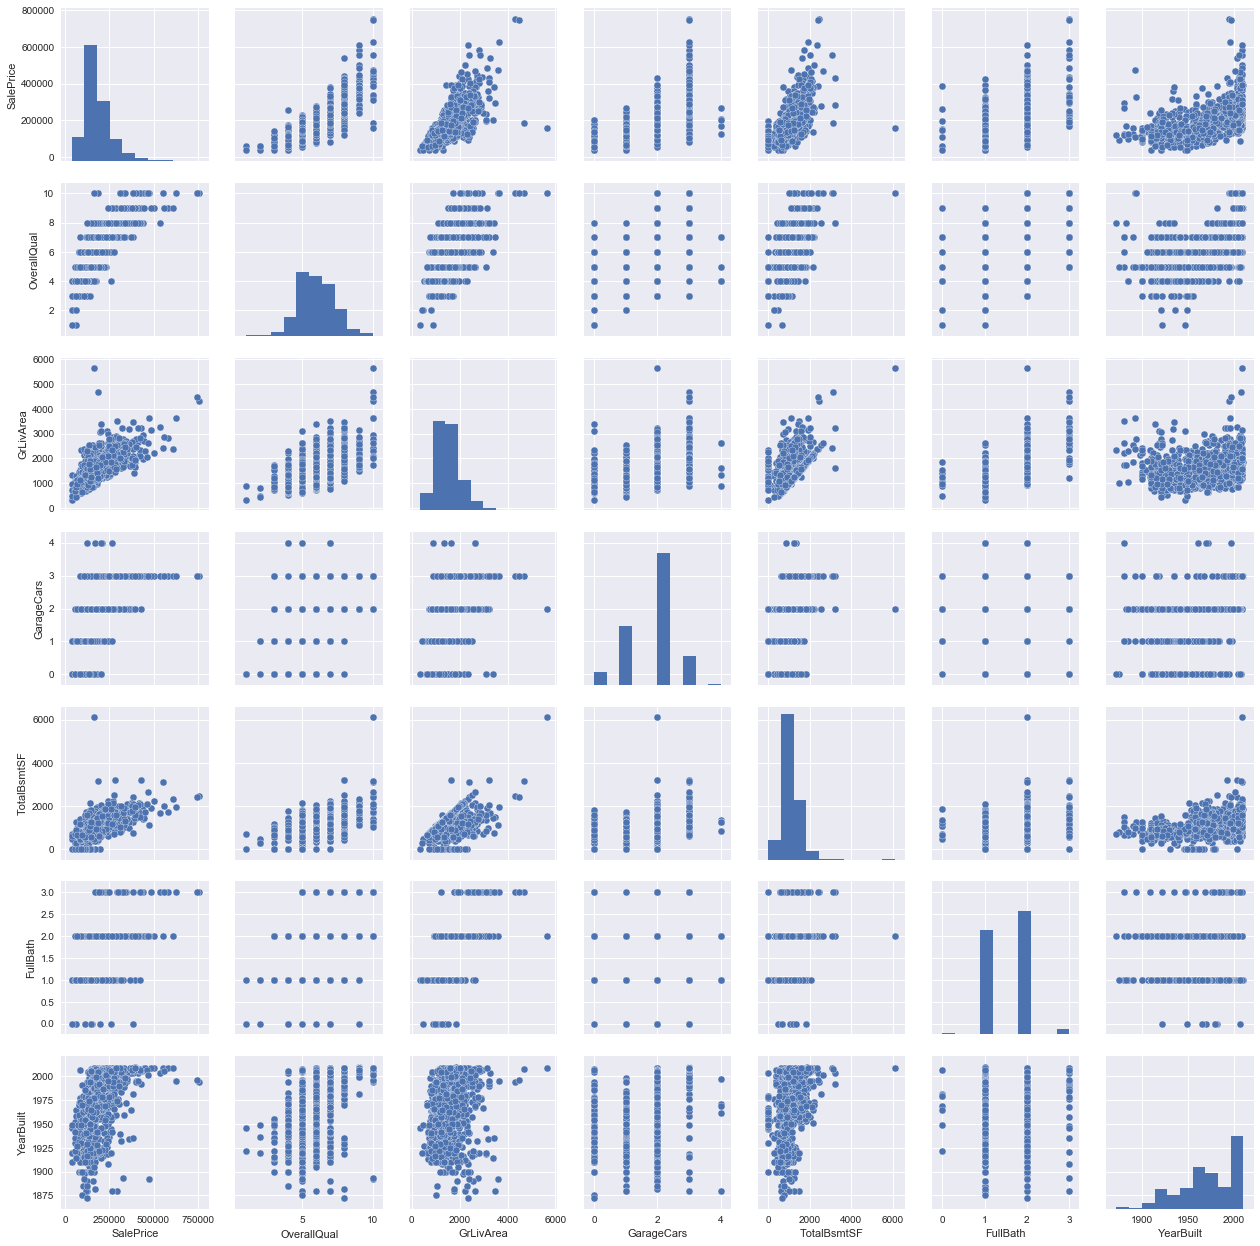

In [39]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.set()
sns.pairplot(Iowa_train[cols], size=2.5)

We can gain some valuable insight using pairplot on the variables we have understood before esp. `SalePrice` and `YearBuilt` seems a weak estimator for now but increasing steadily after some time slot. So, a Time-Series Analysis of these varaibles would be good to do for further understanding.

## Missing Data

We have to deal with missing data to build our model more efficiently in order to predict the future houses accordingly. Also, missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth. 

In [40]:
miss_count = Iowa_train.isnull().sum().sort_values(ascending=False)
miss_percent = ((Iowa_train.isnull().sum()/Iowa_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([miss_count, miss_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


As seen some variables miss a lot of data like `PoolQC`, `MiscFeature` etc. we can delete these variables and move forward as they don't seems to correlate much with target varaible anyway. These values might actually pose to be outliers than actual predictors which we can verify in the following analysis in a bit.

The Other `GarageX` variables have some missing data aswell which is around 5% as we have concluded before `GarageCars` is highest correlated among the `GarageX` variables we can delete the others, the same can be said about the `BsmtX` varaibles.

The `MasVnrArea` and `MasvnrType` varaibles are strongly correlated to `YearBuilt` so we can delete these aswell. Finally `Electrical` has one missing value which we can delete or add as mean of the column in its place.

In [41]:
# Dealing with missing data as discussed
Iowa_train = Iowa_train.drop((missing_data[missing_data.Total > 1]).index, 1)
Iowa_train = Iowa_train.drop(Iowa_train.loc[Iowa_train.Electrical.isnull()].index)

# Check for any missing values
Iowa_train.isnull().sum().max()

0

## Outliers
Lets deal with Outliers using Univariate Analysis, Bivaraite Analysis, Boxplots, Multivaraite Analysis and Scatter plots.

### Univariate Analysis
Quick analysis through the standard deviation of `SalePrice` and a set of scatter plots for some single variables to point out the outliers. 

In order to see if its outlier we need to set a standard for it and observe it as outlier. To do so lets standardize the data where data values mean is 0 and standard deviation is 1.

In [42]:
# Standardize the data
scaled_SalePrice = StandardScaler().fit_transform(Iowa_train.SalePrice[:, np.newaxis])
range_low = scaled_SalePrice[scaled_SalePrice[:, 0].argsort()][:10]
range_high = scaled_SalePrice[scaled_SalePrice[:, 0].argsort()][-10:]
print('The Outer Range (Low) of the distribution: ', range_low)
print('The Outer Range (High) of the distribution: ', range_high)

The Outer Range (Low) of the distribution:  [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
The Outer Range (High) of the distribution:  [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### Bivariate Analysis
We can do this using Scatter Plots and observe something out of the ordinary like the outliers which stray away from the pack of values.

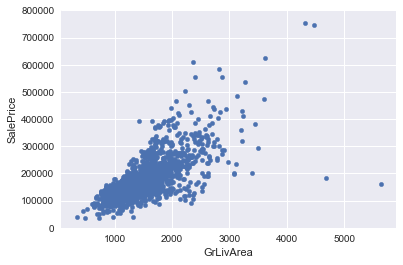

In [43]:
# Scatter plot 'GrLivArea' Vs 'SalePrice'
# Scatter plot 'GrLivArea' Vs 'SalePrice'
plot_data_Gr = pd.concat([Iowa_train.SalePrice, Iowa_train.GrLivArea], axis=1)
plot_data_Gr.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

Understanding-
- The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. Since they are not typical case we can delete them from the training data.
- The two observations in the top of the plot are those 7.something observations that we observed before. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.


In [44]:
# Delete the points
Iowa_train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [45]:
Iowa_train.drop(Iowa_train[Iowa_train.Id == 1299].index, inplace=True)
Iowa_train.drop(Iowa_train[Iowa_train.Id == 524].index, inplace=True)

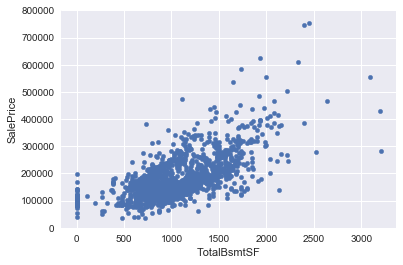

In [46]:
# Scatter plot 'TotalBsmtSF' Vs 'SalePrice'
plot_data_Bs = pd.concat([Iowa_train.SalePrice, Iowa_train.TotalBsmtSF], axis=1)
plot_data_Bs.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

Understanding -
All the variables seem to follow a trend, we could delete some outliers but they might seem to follow a new case so lets keep them.

### Multivariate Analysis

We already did some data cleaning and discovered a lot about `SalePrice`. Now we need to understand how `SalePrice` complies with the statistical assumptions for the multivaraite analysis where we check for the following four assumptions.

- Normality - Data should look like a normal distribution
- Homoscedasticity - Dependant variables exhibit equal levels of variance across range of predictor varaibles
- Linearity 
- Absence of correlated errors - Happens when one error is correlated to other. [[ref](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503/ref=as_sl_pc_tf_til?tag=pmarcelino-20&linkCode=w00&linkId=5e9109fa2213fef911dae80731a07a17&creativeASIN=9332536503)]

#### Normality
Testing `SalePrice` using **Histogram** and **Normal Probability Plot**

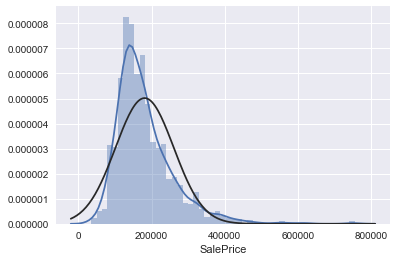

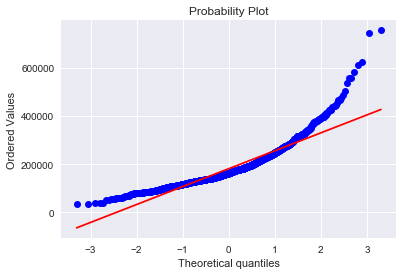

In [47]:
sns.distplot(Iowa_train.SalePrice, fit=norm)
fig = plt.figure()
res = stats.probplot(Iowa_train.SalePrice, plot=plt)

Our target variable `SalePrice` has positive skewness hence the peak. Log Transformations or Box-Cox transformations are usually good for +ve Skewed varaibles.

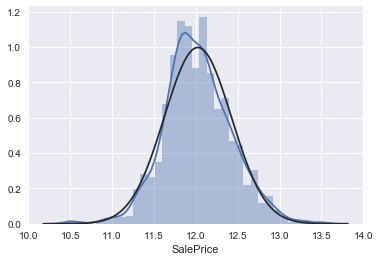

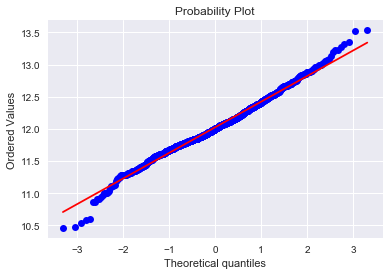

In [48]:
# Log Transformation
Iowa_train.SalePrice = np.log(Iowa_train.SalePrice)
sns.distplot(Iowa_train.SalePrice, fit=norm)
fig = plt.figure()
res = stats.probplot(Iowa_train.SalePrice, plot=plt)

Do the same for `GrLivArea`, `TotalBsmtSF`

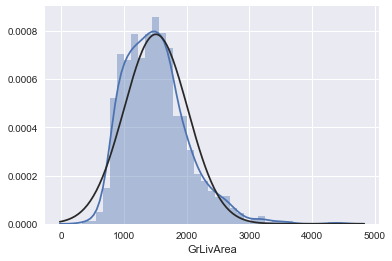

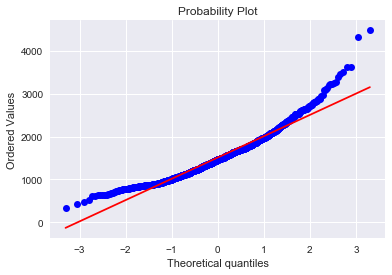

In [49]:
# GrLivArea Histogram and Probability plot
sns.distplot(Iowa_train.GrLivArea, fit=norm)
fig = plt.figure()
res = stats.probplot(Iowa_train.GrLivArea, plot=plt)

Positive skewed again lets do a Log transform

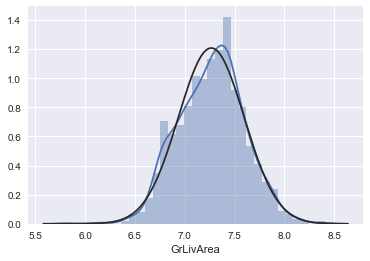

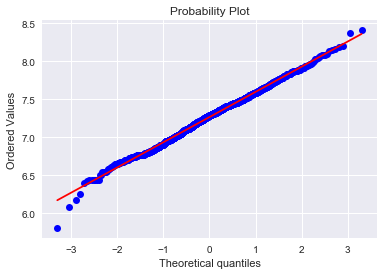

In [50]:
# Log transformation
Iowa_train.GrLivArea = np.log(Iowa_train.GrLivArea)
sns.distplot(Iowa_train.GrLivArea, fit=norm)
fig = plt.figure()
res = stats.probplot(Iowa_train.GrLivArea, plot=plt)

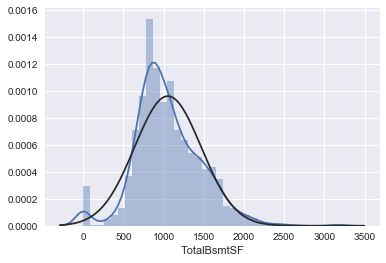

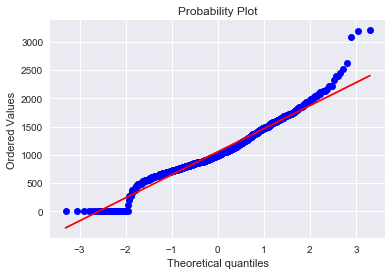

In [51]:
# TotalBsmtSF Histogram and Prob plot
sns.distplot(Iowa_train.TotalBsmtSF, fit=norm)
fig = plt.figure()
res = stats.probplot(Iowa_train.TotalBsmtSF, plot=plt)

Lot of houses seem to have '0' indicating no basements, as '0' values pose problem for log transformation so we can just divide the data which have '0' values and which dont, apply log trans for the values which aren't zero.

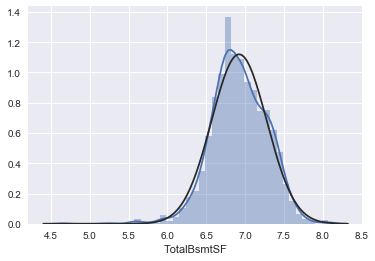

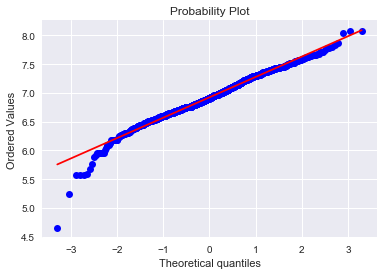

In [52]:
# Creating new column indicating if it has Bsmt or not, if area> 0 mark it as 1 otherwise 0
Iowa_train['HasBsmt'] = 0
Iowa_train.loc[Iowa_train.TotalBsmtSF > 0, 'HasBsmt'] = 1

# Transform Data
Iowa_train.loc[Iowa_train.HasBsmt == 1, 'TotalBsmtSF'] = np.log(Iowa_train.TotalBsmtSF)

# Histogram and Normal Prob plot
sns.distplot(Iowa_train[Iowa_train.TotalBsmtSF > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(Iowa_train[Iowa_train.TotalBsmtSF > 0]['TotalBsmtSF'], plot=plt)